# Playground for Advanced Topics Slides - FE

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2022-07-04 14:09:52.785603


In [2]:
pip install category_encoders numexpr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# disable chained assignments
pd.options.mode.chained_assignment = None 

# Load Data

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/stepthom/869_course/main/data/GermanCredit.csv')
df['Class'] = df['Class'].map({'Good': 1, 'Bad': 0})
df['Salary'] = df['Amount']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   Class                                   1000 non-null   int64
 10  CheckingAccountStatus.lt.0              1000 non-null   int64
 11  CheckingAccountSta

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Salary
0,6,1169,4,4,67,2,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1169
1,48,5951,2,2,22,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,5951
2,12,2096,2,3,49,1,2,1,1,1,...,0,1,0,1,0,0,1,0,0,2096
3,42,7882,2,4,45,1,2,1,1,1,...,0,1,0,0,1,0,0,1,0,7882
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,0,1,0,4870


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

In [9]:
#Create a feature with some missing data 
X_train = pd.DataFrame(data={
                         'Age': [34, 54, 29, 28, 53, 45, 32, 98, 34, 23, 21, 47, 76, 45, 30],
                         'Income': [np.NAN, 6836, 2319, 1236, 5003, 886, 1442, 2978, np.NAN, 5400, np.NAN, 2996, 3780, 4211, 8543],
                         })
X_train

#Create a feature with some missing data 
X_test = pd.DataFrame(data={
                         'Age': [76, 45, 30],
                         'Income': [np.NAN, 6836, 5415],
                         })

,Age,Income
0,34,NaN
1,54,6836.0
2,29,2319.0
3,28,1236.0
4,53,5003.0
5,45,886.0
6,32,1442.0
7,98,2978.0
8,34,NaN
9,23,5400.0


## Simple Imputation

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer = imputer.fit(X_train[['Income']])

X_train['Income_Imputed'] = imputer.transform(X_train[["Income"]])
X_test['Income_Imputed'] = imputer.transform(X_test[['Income']])

In [11]:
X_train[["Income_Imputed"]]

,Income_Imputed
0,3802.5
1,6836.0
2,2319.0
3,1236.0
4,5003.0
5,886.0
6,1442.0
7,2978.0
8,3802.5
9,5400.0


In [12]:
X_test[["Income_Imputed"]]

,Income_Imputed
0,3802.5
1,6836.0
2,5415.0


In [13]:
imputer.statistics_

array([3802.5])

## Multiple Imputation

In [14]:
#Create a feature with some missing data 
X_train = pd.DataFrame(data={
                         'Age':    [34, 54, 29, 28, 53, 25, 32, 68, 30, 23, 51, 47, 76, 45, 30],
                         'Income': [np.NAN, 6836, 2319, 1236, 5003, 886, 2442, 2978, np.NAN, 5400, np.NAN, 5996, 5780, 4211, 3543],
                         })
X_train

#Create a feature with some missing data 
X_test = pd.DataFrame(data={
                         'Age': [66, 45, 30],
                         'Income': [np.NAN, 6836, 5415],
                         })

X_test

,Age,Income
0,34,NaN
1,54,6836.0
2,29,2319.0
3,28,1236.0
4,53,5003.0
5,25,886.0
6,32,2442.0
7,68,2978.0
8,30,NaN
9,23,5400.0


,Age,Income
0,66,NaN
1,45,6836.0
2,30,5415.0


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

imputer = IterativeImputer(estimator=LinearRegression())
imputer = imputer.fit(X_train)

imputer.transform(X_train)

array([[  34.        , 3388.27590788],
       [  54.        , 6836.        ],
       [  29.        , 2319.        ],
       [  28.        , 1236.        ],
       [  53.        , 5003.        ],
       [  25.        ,  886.        ],
       [  32.        , 2442.        ],
       [  68.        , 2978.        ],
       [  30.        , 3154.13123708],
       [  23.        , 5400.        ],
       [  51.        , 4383.39075878],
       [  47.        , 5996.        ],
       [  76.        , 5780.        ],
       [  45.        , 4211.        ],
       [  30.        , 3543.        ]])

In [16]:
imputer.transform(X_test)

array([[  66.        , 5261.43327428],
       [  45.        , 6836.        ],
       [  30.        , 5415.        ]])

## Feature Scaling

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Helper function to make a nice-looking histogram

def plot_hist(feature, title):
    plt.figure(figsize=(8, 5));
    plt.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    plt.title(title, fontsize=20);
    #ax.tick_params(axis='both', which='major', labelsize=18);
    plt.grid(True);

In [19]:
X_train[['Salary']].head(10)

,Salary
29,6836
535,2319
695,1236
557,5003
836,886
596,1442
165,2978
918,2359
495,2996
824,3780


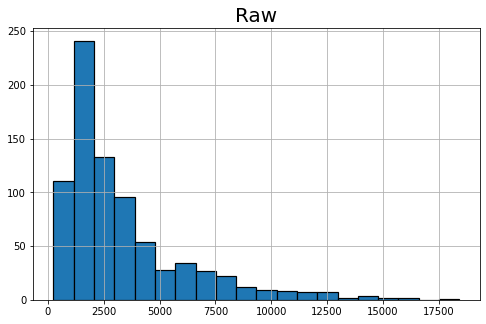

In [20]:
plot_hist(X_train['Salary'], "Raw");

## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_Std'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Std'] = scaler.transform(X_test[['Salary']])

StandardScaler()

In [22]:
X_train[['Salary_Std']].head(10)

,Salary_Std
29,1.199912
535,-0.359630
695,-0.733547
557,0.567050
836,-0.854388
596,-0.662423
165,-0.132103
918,-0.345819
495,-0.125888
824,0.144796


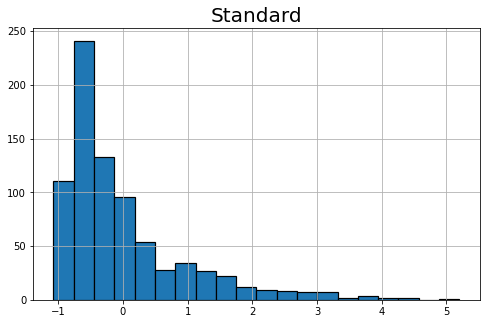

In [23]:
plot_hist(X_train['Salary_Std'], "Standard");

## MinMax

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_MinMax'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_MinMax'] = scaler.transform(X_test[['Salary']])   

MinMaxScaler()

In [25]:
X_train[['Salary_MinMax']].head(10)

,Salary_MinMax
29,0.362386
535,0.113844
695,0.054253
557,0.261527
836,0.034995
596,0.065588
165,0.150105
918,0.116045
495,0.151095
824,0.194234


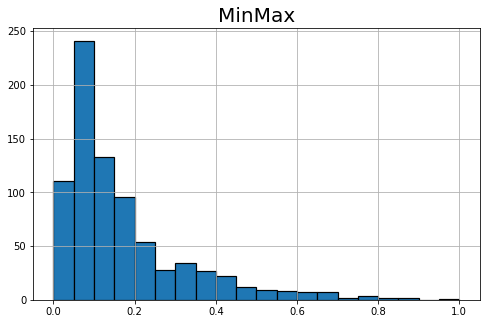

In [26]:
plot_hist(X_train['Salary_MinMax'], "MinMax");

## Log

In [27]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_train[['Salary']])
X_train['Salary_Log'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Log'] = scaler.transform(X_test[['Salary']]) 

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [28]:
X_train[['Salary_Log']].head(10)

,Salary_Log
29,8.830104
535,7.749322
695,7.120444
557,8.517993
836,6.787845
596,7.274480
165,7.999343
918,7.766417
495,8.005367
824,8.237744


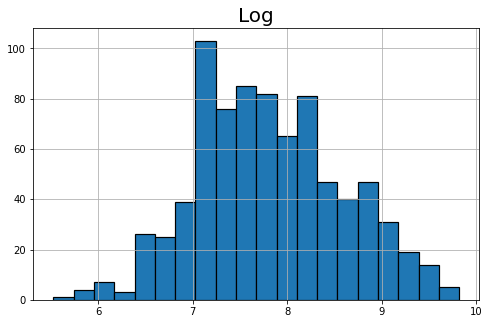

In [29]:
plot_hist(X_train['Salary_Log'], "Log");

## Box-Cox

In [30]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox')
scaler.fit(X_train[['Salary']])
X_train['Salary_BoxCox'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_BoxCox'] = scaler.transform(X_test[['Salary']]) 

PowerTransformer(method='box-cox')

In [31]:
X_train[['Salary_BoxCox']].head(10)

,Salary_BoxCox
29,1.291730
535,-0.054503
695,-0.893962
557,0.914991
836,-1.355653
596,-0.684355
165,0.267494
918,-0.032279
495,0.275172
824,0.568502


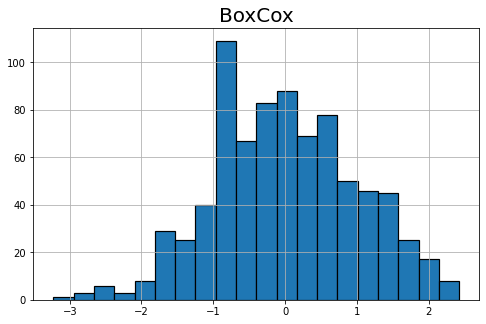

In [32]:
plot_hist(X_train['Salary_BoxCox'], "BoxCox");

## Yeo-Johnson

In [33]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train[['Salary']])
X_train['Salary_YeoJohnson'] = scaler.transform(X_train[['Salary']])  

PowerTransformer()

In [34]:
X_train[['Salary_YeoJohnson']].head(10)

,Salary_YeoJohnson
29,1.291774
535,-0.054483
695,-0.894055
557,0.915073
836,-1.355755
596,-0.684425
165,0.267553
918,-0.032256
495,0.275232
824,0.568584


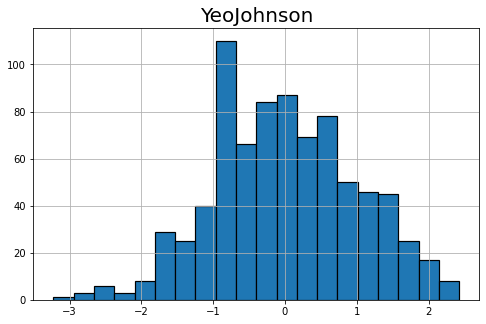

In [35]:
plot_hist(X_train['Salary_YeoJohnson'], "YeoJohnson");

## Binning

In [36]:
# TODO

# Categorical Features


We will create a little fake dataset to help illustrate how the different encoding schemes work.

In [37]:
train_df = pd.DataFrame(data={
    
                          # An ID and two categorical features to play around with
                         'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                         'Province': ['ON', 'QB', 'AB', 'ON', 'ON', 'BC', 'BC', 'QB', 'AB', 'ON', 'QB', 'AB', 'ON', 'ON', 'ON'],
                         'Income': ['Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'High', 'High'],

                         # We'll make one binary target
                         'Default': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],

                         # And one multi-label target (for testing below)
                         'Risk': [1, 1, 2, 2,    0, 0, 1, 1, 1, 2,    0, 0, 0, 1, 1],
                         })

train_df
X_train = train_df.drop(['Default', 'Risk'], axis=1)
y_train1 = train_df['Default']
y_train2 = train_df['Risk']

,ID,Province,Income,Default,Risk
0,1,ON,Low,0,1
1,2,QB,Low,1,1
2,3,AB,Low,1,2
3,4,ON,Low,1,2
4,5,ON,Medium,0,0
5,6,BC,Medium,0,0
6,7,BC,Medium,0,1
7,8,QB,Medium,1,1
8,9,AB,Medium,1,1
9,10,ON,Medium,1,2


In [38]:
X_test = pd.DataFrame(data={'ID': [101, 102, 103, 104], 
                         'Province': ['ON', 'QB', 'AB', 'ON'],
                         'Income': ['Low', 'Low', 'Medium', 'High'],
                             })

X_test

,ID,Province,Income
0,101,ON,Low
1,102,QB,Low
2,103,AB,Medium
3,104,ON,High


## One Hot Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc = enc.fit(X_train[['Province']])

enc.transform(X_train[['Province']])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [40]:
# If you want it back into the original pandas dataframe...

_ohe_array = enc.transform(X_train[['Province']])
_ohe_names = enc.get_feature_names()
for i in range(_ohe_array.shape[1]):
  X_train[_ohe_names[i]] = _ohe_array[:,i]

X_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ID,Province,Income,x0_AB,x0_BC,x0_ON,x0_QB
0,1,ON,Low,0.0,0.0,1.0,0.0
1,2,QB,Low,0.0,0.0,0.0,1.0
2,3,AB,Low,1.0,0.0,0.0,0.0
3,4,ON,Low,0.0,0.0,1.0,0.0
4,5,ON,Medium,0.0,0.0,1.0,0.0
5,6,BC,Medium,0.0,1.0,0.0,0.0
6,7,BC,Medium,0.0,1.0,0.0,0.0
7,8,QB,Medium,0.0,0.0,0.0,1.0
8,9,AB,Medium,1.0,0.0,0.0,0.0
9,10,ON,Medium,0.0,0.0,1.0,0.0


In [41]:
enc.transform(X_test[['Province']])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

## Ordinal Encoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc = enc.fit(X_train[['Income']])

X_train['Income_Ord'] = enc.transform(X_train[['Income']])

In [43]:
X_train

,ID,Province,Income,x0_AB,x0_BC,x0_ON,x0_QB,Income_Ord
0,1,ON,Low,0.0,0.0,1.0,0.0,1.0
1,2,QB,Low,0.0,0.0,0.0,1.0,1.0
2,3,AB,Low,1.0,0.0,0.0,0.0,1.0
3,4,ON,Low,0.0,0.0,1.0,0.0,1.0
4,5,ON,Medium,0.0,0.0,1.0,0.0,2.0
5,6,BC,Medium,0.0,1.0,0.0,0.0,2.0
6,7,BC,Medium,0.0,1.0,0.0,0.0,2.0
7,8,QB,Medium,0.0,0.0,0.0,1.0,2.0
8,9,AB,Medium,1.0,0.0,0.0,0.0,2.0
9,10,ON,Medium,0.0,0.0,1.0,0.0,2.0


In [44]:
enc.categories_

[array(['High', 'Low', 'Medium'], dtype=object)]

In [45]:
enc.transform(X_test[['Income']])

array([[1.],
       [1.],
       [2.],
       [0.]])

We could also force the categories to be in a certain order:

In [46]:
enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
enc = enc.fit(X_train[['Income']])

enc.transform(X_train[['Income']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [47]:
enc.categories_

[array(['Low', 'Medium', 'High'], dtype=object)]

In [48]:
enc.transform(X_test[['Income']])

array([[0.],
       [0.],
       [1.],
       [2.]])

## Target Encoding

In [49]:
train_df

,ID,Province,Income,Default,Risk
0,1,ON,Low,0,1
1,2,QB,Low,1,1
2,3,AB,Low,1,2
3,4,ON,Low,1,2
4,5,ON,Medium,0,0
5,6,BC,Medium,0,0
6,7,BC,Medium,0,1
7,8,QB,Medium,1,1
8,9,AB,Medium,1,1
9,10,ON,Medium,1,2


In [50]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

enc = ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True)
enc.fit(X_train[['Income']], y_train1)

enc.transform(X_train[['Income']])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


TargetEncoder(cols=['Income'], smoothing=0)

,Income
0,0.75
1,0.75
2,0.75
3,0.75
4,0.50
5,0.50
6,0.50
7,0.50
8,0.50
9,0.50


In [51]:
enc.transform(X_test[['Income']])

,Income
0,0.75
1,0.75
2,0.50
3,0.20


## Target Encoding with A Multi-label Target

In [52]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

enc = PolynomialWrapper(ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True))
enc.fit(X_train[['Income']], y_train2.tolist())

enc.transform(X_train[['Income']])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,Income_2,Income_0
0,0.500000,0.000000
1,0.500000,0.000000
2,0.500000,0.000000
3,0.500000,0.000000
4,0.166667,0.333333
5,0.166667,0.333333
6,0.166667,0.333333
7,0.166667,0.333333
8,0.166667,0.333333
9,0.166667,0.333333


## Contrasts

In [53]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(800, 62)

(200, 62)

# Aggregations

In [54]:
import featuretools as ft

# Let's load a different kind of dataset - one that has lots of transactions

es = ft.demo.load_mock_customer(return_entityset=True)
es

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


Entityset: transactions
  DataFrames:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 3]
    sessions [Rows: 35, Columns: 5]
    customers [Rows: 5, Columns: 5]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [55]:
es["transactions"].head(30)

,transaction_id,session_id,transaction_time,product_id,amount,_ft_last_time
298,298,1,2014-01-01 00:00:00,5,127.64,2014-01-01 00:00:00
2,2,1,2014-01-01 00:01:05,2,109.48,2014-01-01 00:01:05
308,308,1,2014-01-01 00:02:10,3,95.06,2014-01-01 00:02:10
116,116,1,2014-01-01 00:03:15,4,78.92,2014-01-01 00:03:15
371,371,1,2014-01-01 00:04:20,3,31.54,2014-01-01 00:04:20
486,486,1,2014-01-01 00:05:25,3,23.76,2014-01-01 00:05:25
271,271,1,2014-01-01 00:06:30,3,43.63,2014-01-01 00:06:30
192,192,1,2014-01-01 00:07:35,4,42.27,2014-01-01 00:07:35
341,341,1,2014-01-01 00:08:40,3,47.68,2014-01-01 00:08:40
10,10,1,2014-01-01 00:09:45,5,57.39,2014-01-01 00:09:45


In [56]:
feature_matrix, features = ft.dfs(entityset=es,
                                   target_dataframe_name="customers",
                                   verbose=True)
feature_matrix

Built 75 features
Elapsed: 00:00 | Progress: 100%|██████████


,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3


In [57]:
list(feature_matrix)

['zip_code',
 'COUNT(sessions)',
 'MODE(sessions.device)',
 'NUM_UNIQUE(sessions.device)',
 'COUNT(transactions)',
 'MAX(transactions.amount)',
 'MEAN(transactions.amount)',
 'MIN(transactions.amount)',
 'MODE(transactions.product_id)',
 'NUM_UNIQUE(transactions.product_id)',
 'SKEW(transactions.amount)',
 'STD(transactions.amount)',
 'SUM(transactions.amount)',
 'DAY(birthday)',
 'DAY(join_date)',
 'MONTH(birthday)',
 'MONTH(join_date)',
 'WEEKDAY(birthday)',
 'WEEKDAY(join_date)',
 'YEAR(birthday)',
 'YEAR(join_date)',
 'MAX(sessions.COUNT(transactions))',
 'MAX(sessions.MEAN(transactions.amount))',
 'MAX(sessions.MIN(transactions.amount))',
 'MAX(sessions.NUM_UNIQUE(transactions.product_id))',
 'MAX(sessions.SKEW(transactions.amount))',
 'MAX(sessions.STD(transactions.amount))',
 'MAX(sessions.SUM(transactions.amount))',
 'MEAN(sessions.COUNT(transactions))',
 'MEAN(sessions.MAX(transactions.amount))',
 'MEAN(sessions.MEAN(transactions.amount))',
 'MEAN(sessions.MIN(transactions.amo

In [58]:
ft.list_primitives() 

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,any,aggregation,True,False,Determines if any value is 'True' in a list.,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = Boolean)>
1,count,aggregation,True,True,"Determines the total number of values, excludi...",<ColumnSchema (Semantic Tags = ['index'])>,<ColumnSchema (Logical Type = IntegerNullable)...
2,first,aggregation,False,False,Determines the first value in a list.,<ColumnSchema>,None
3,skew,aggregation,False,False,Computes the extent to which a distribution di...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
4,n_most_common,aggregation,False,False,Determines the `n` most common elements.,<ColumnSchema (Semantic Tags = ['category'])>,None
...,...,...,...,...,...,...,...
108,greater_than_equal_to,transform,True,True,Determines if values in one list are greater t...,"<ColumnSchema (Logical Type = Datetime)>, <Col...",<ColumnSchema (Logical Type = BooleanNullable)>
109,is_leap_year,transform,True,True,Determines the is_leap_year attribute of a dat...,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = BooleanNullable)>
110,multiply_boolean,transform,True,False,Element-wise multiplication of two lists of bo...,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = BooleanNullable)>
111,natural_logarithm,transform,True,True,Computes the natural logarithm of a number.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Double) (Semanti...
